# Analysis-of-Bank-Debit-Collection-and-Recovery-Strategies

The goal for the data scientist is to determine in this non-random assignment whether the incremental amount the bank earns exceeded the additional cost of assigning customers to a higher recovery strategy.

# Project Description

After a debt has been legally declared "uncollectable" by a bank, the account is considered to be "charged-off." But that doesn't mean the bank simply walks away from the debt. They still want to collect some of the money they are owed. In this project, you will look at a situation where a bank assigned delinquent customers to different recovery strategies based on the expected amount the bank believed it would recover from the customer. The goal for the data scientist is to determine in this non-random assignment whether the incremental amount the bank earns exceeded the additional cost of assigning customers to a higher recovery strategy.

Threshold assignments like this also one occur in medicine (above a certain temperature you get medicine), education (above a certain test score students get admitted to a special class), other areas of finance (above a certain wealth customers get different levels of service), and public sector (below a certain income someone is eligible for housing benefits). Regression discontinuity is an intuitive and useful analysis method in any situation of a threshold assignment.

# Project Tasks:

# Regression discontinuity: banking recovery

After a debt has been legally declared "uncollectable" by a bank, the account is considered "charged-off." But that doesn't mean the bank walks away from the debt. They still want to collect some of the money they are owed. The bank will score the account to assess the expected recovery amount, that is, the expected amount that the bank may be able to receive from the customer in the future. This amount is a function of the probability of the customer paying, the total debt, and other factors that impact the ability and willingness to pay.

The bank has implemented different recovery strategies at different thresholds (1000,2000, etc.) where the greater the expected recovery amount, the more effort the bank puts into contacting the customer. For low recovery amounts (Level 0), the bank just adds the customer's contact information to their automatic dialer and emailing system. For higher recovery strategies, the bank incurs more costs as they leverage human resources in more efforts to obtain payments.

In [1]:
#Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import warnings to ignore warnings
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Read Data
data=pd.read_csv('C:/Technocolab/Dataset/bank_data.csv')

# Regression discontinuity: banking recovery

EDA & Data Preprocessing

In [4]:
#Shape
data.shape

(1882, 6)

In [5]:
#Display whole data
data

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [6]:
#Display first 25 
data.head(25)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male
5,731,548,520.710,Level 0 Recovery,35,Male
6,221,549,221.585,Level 0 Recovery,33,Male
7,1932,560,373.720,Level 0 Recovery,19,Female
8,1828,562,201.865,Level 0 Recovery,22,Female
9,2001,565,504.885,Level 0 Recovery,27,Male


In [7]:
#Display Last 25
data.tail(25)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1857,161,9070,28879.176730,Level 4 Recovery,50,Male
1858,699,9173,17131.516800,Level 4 Recovery,61,Male
1859,401,9193,34398.479710,Level 4 Recovery,72,Female
1860,796,9199,21169.807330,Level 4 Recovery,66,Female
1861,429,9218,14352.195880,Level 4 Recovery,60,Female
1862,1712,9232,19909.239000,Level 4 Recovery,61,Female
1863,186,9290,10351.154260,Level 4 Recovery,55,Female
1864,1583,9299,29170.031740,Level 4 Recovery,60,Female
1865,266,9341,18407.449580,Level 4 Recovery,47,Female
1866,1805,9352,24497.147390,Level 4 Recovery,53,Female


In [8]:
#check the values in recovery_strategy
data["recovery_strategy"].unique()

array(['Level 0 Recovery', 'Level 1 Recovery', 'Level 2 Recovery',
       'Level 3 Recovery', 'Level 4 Recovery'], dtype=object)

In [9]:
# Min Expected recovery amount based on recovery strategy 
data[['recovery_strategy','expected_recovery_amount']].groupby('recovery_strategy').min()

,expected_recovery_amount
recovery_strategy,
Level 0 Recovery,194
Level 1 Recovery,1001
Level 2 Recovery,2001
Level 3 Recovery,3002
Level 4 Recovery,5008


In [10]:
# Max Expected recovery amount based on recovery strategy 
data[['recovery_strategy','expected_recovery_amount']].groupby('recovery_strategy').max()

,expected_recovery_amount
recovery_strategy,
Level 0 Recovery,1000
Level 1 Recovery,1997
Level 2 Recovery,2992
Level 3 Recovery,4987
Level 4 Recovery,9964


In [11]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [12]:
#To describe
data.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [13]:
#Check Null Values
data.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

No null values

# Graphical exploratory data analysis

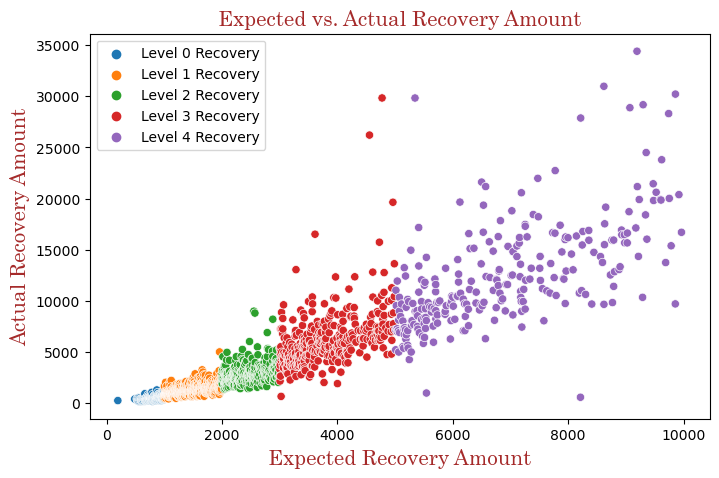

In [14]:
# Scatterplot to show expected recovery amount vs. actual recovery amount
plt.figure(figsize=(8,5))
#font
font={'family':'Century','color':'brown','size':'15'}
sns.scatterplot(x="expected_recovery_amount", y="actual_recovery_amount", data=data, hue="recovery_strategy")
plt.title("Expected vs. Actual Recovery Amount",fontdict=font)
plt.xlabel("Expected Recovery Amount",fontdict=font)
plt.ylabel("Actual Recovery Amount",fontdict=font)
plt.legend()
plt.show()

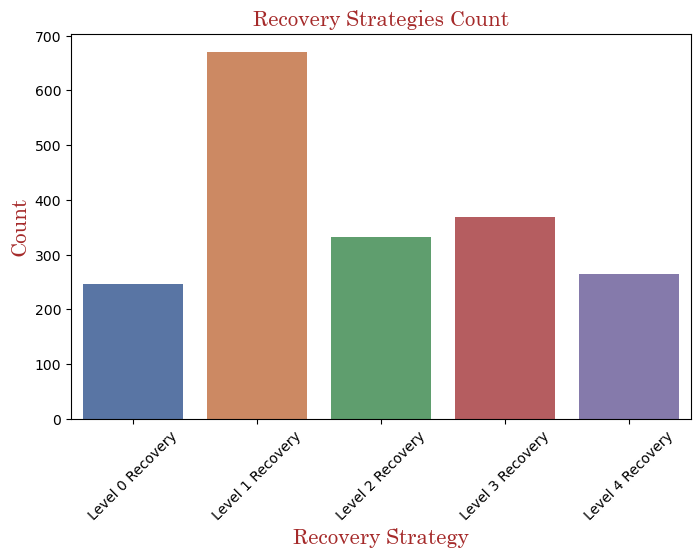

In [15]:
# Countplot to show recovery strategies count
plt.figure(figsize=(8, 5))
sns.countplot(x="recovery_strategy", data=data, palette="deep")
plt.title("Recovery Strategies Count",fontdict=font)
plt.xlabel("Recovery Strategy",fontdict=font)
plt.ylabel("Count",fontdict=font)
plt.xticks(rotation=45)
plt.show()

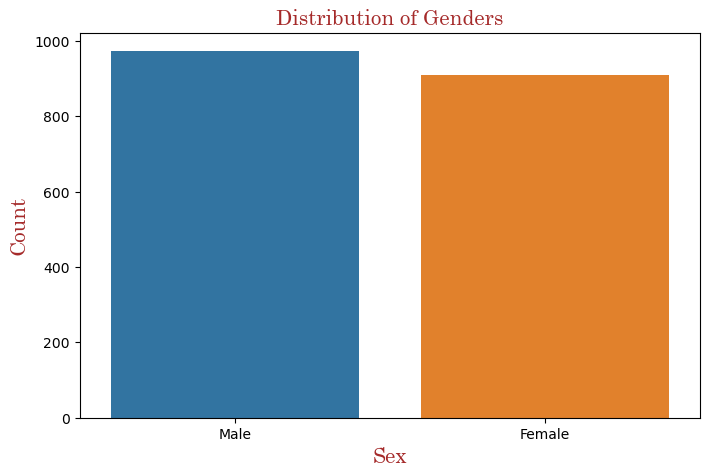

In [16]:
# Countplot to show the distribution of genders
plt.figure(figsize=(8,5))
sns.countplot(x="sex", data=data)
plt.title("Distribution of Genders",fontdict=font)
plt.xlabel("Sex",fontdict=font)
plt.ylabel("Count",fontdict=font)
plt.show()

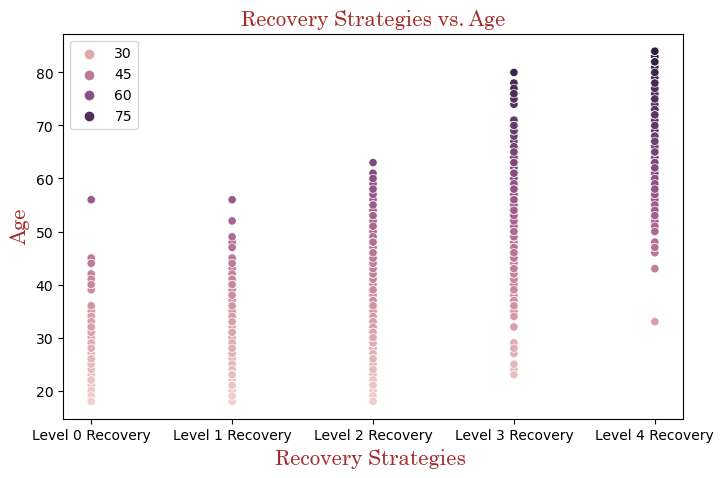

In [17]:
# Scatterplot to show recovery statergy vs. age
plt.figure(figsize=(8,5))
sns.scatterplot(x="recovery_strategy", y="age", data=data, hue="age")
plt.title("Recovery Strategies vs. Age",fontdict=font)
plt.xlabel("Recovery Strategies ",fontdict=font)
plt.ylabel("Age",fontdict=font)
plt.legend()
plt.show()

In [18]:
data["age"].min()

18

In [19]:
data["age"].max()

84

From the above scatter plot we can find age limit is in between 18 to 60 for the amount 0 to 2000.This range covers Levels 0 and 1.

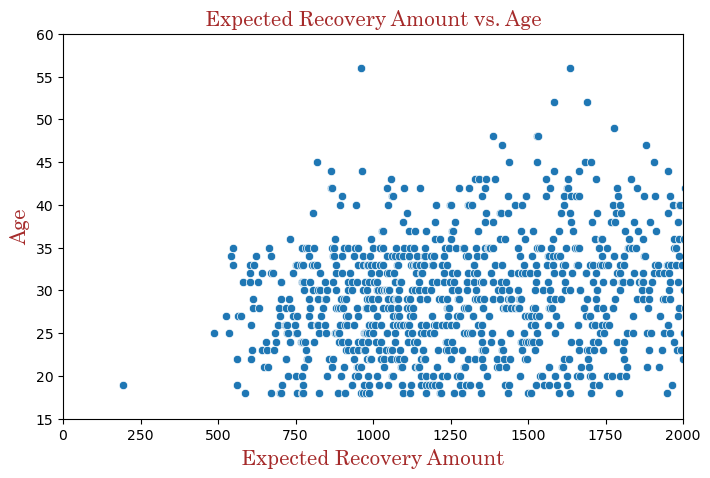

In [20]:
#Scatter plot of the age as a function of Expected Recovery Amount for a small window of Expected Recovery Amount, $0 to $2000
plt.figure(figsize=(8,5))
sns.scatterplot(x="expected_recovery_amount", y="age", data=data)
plt.xlim(0,2000)
plt.ylim(15,60)
plt.title("Expected Recovery Amount vs. Age",fontdict=font)
plt.xlabel("Expected Recovery Amount",fontdict=font)
plt.ylabel("Age",fontdict=font)
plt.show()

# Statistical test: age vs. expected recovery amount

In [21]:
from scipy import stats

In [22]:
# Average age just below and above the threshold
data_900_1100 = data.loc[(data['expected_recovery_amount']<1100) & (data['expected_recovery_amount']>=900)]
data_900_1100

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
158,520,900,504.790000,Level 0 Recovery,34,Male
159,1036,900,539.535000,Level 0 Recovery,34,Female
160,1383,900,554.745000,Level 0 Recovery,24,Male
161,998,901,887.005000,Level 0 Recovery,32,Male
162,1351,903,667.035000,Level 0 Recovery,28,Male
...,...,...,...,...,...,...
336,1184,1096,1077.218384,Level 1 Recovery,38,Male
337,1664,1096,2053.290126,Level 1 Recovery,18,Female
338,302,1098,876.997775,Level 1 Recovery,34,Male
339,554,1098,1836.918718,Level 1 Recovery,26,Female


In [23]:
#Kruskal-Wallis test 
Age_Level_0 = data_900_1100.loc[data['recovery_strategy']=="Level 0 Recovery"]['age']
Age_Level_0

158    34
159    34
160    24
161    32
162    28
       ..
242    22
243    36
244    29
245    26
246    28
Name: age, Length: 89, dtype: int64

In [24]:
Age_Level_1 = data_900_1100.loc[data['recovery_strategy']=="Level 1 Recovery"]['age']
Age_Level_1

247    35
248    25
249    31
250    33
251    26
       ..
336    38
337    18
338    34
339    26
340    42
Name: age, Length: 94, dtype: int64

In [25]:
stats.kruskal(Age_Level_0,Age_Level_1) 

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

# Statistical test: sex vs. expected recovery amount

In [26]:
# Percentage of customers in each category
crosstab = pd.crosstab(data.loc[(data['expected_recovery_amount']<1100)&(data['expected_recovery_amount']>=900)]['recovery_strategy'],data['sex'])
crosstab

sex,Female,Male
recovery_strategy,,
Level 0 Recovery,32,57
Level 1 Recovery,39,55


In [27]:
#Import chisquare
from scipy.stats import chi2_contingency

In [28]:
chi2_stat,p_value,dof,exp=chi2_contingency(crosstab)

In [29]:
p_value

0.5377947810444592

In [30]:
if p_value<0.05:
    print("Null Hypothesis Rejected")
else:
    print("Null Hypothesis Accepted")

Null Hypothesis Accepted


# Exploratory graphical analysis: recovery amount

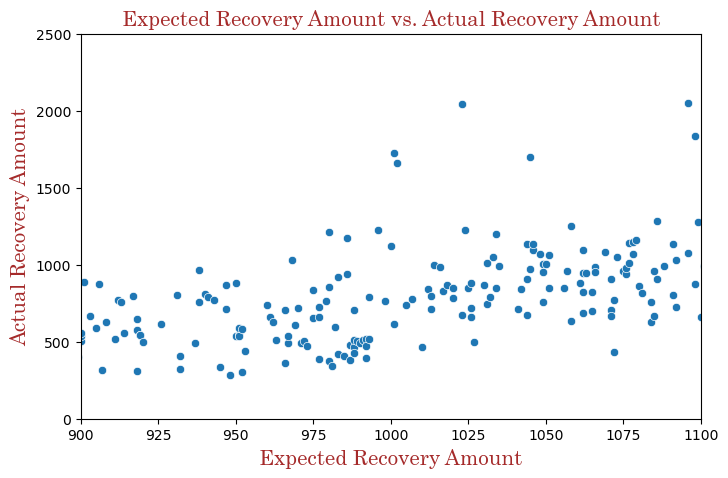

In [31]:
#Scatter plot of the age as a function of Expected Recovery Amount for a small window of Expected Recovery Amount, $0 to $2000
plt.figure(figsize=(8,5))
sns.scatterplot(x="expected_recovery_amount", y="actual_recovery_amount", data=data)
plt.xlim(900,1100)
plt.ylim(0,2500)
plt.title("Expected Recovery Amount vs. Actual Recovery Amount",fontdict=font)
plt.xlabel("Expected Recovery Amount",fontdict=font)
plt.ylabel("Actual Recovery Amount",fontdict=font)
plt.show()

# Statistical analysis: recovery amount

In [32]:
data_900_1100

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
158,520,900,504.790000,Level 0 Recovery,34,Male
159,1036,900,539.535000,Level 0 Recovery,34,Female
160,1383,900,554.745000,Level 0 Recovery,24,Male
161,998,901,887.005000,Level 0 Recovery,32,Male
162,1351,903,667.035000,Level 0 Recovery,28,Male
...,...,...,...,...,...,...
336,1184,1096,1077.218384,Level 1 Recovery,38,Male
337,1664,1096,2053.290126,Level 1 Recovery,18,Female
338,302,1098,876.997775,Level 1 Recovery,34,Male
339,554,1098,1836.918718,Level 1 Recovery,26,Female


In [33]:
# Perform Kruskal-Wallis test
Level_0_900_1100  = data_900_1100.loc[data['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_900_1100  = data_900_1100.loc[data['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']

In [34]:
stats.kruskal(Level_0_900_1100,Level_1_900_1100) 

KruskalResult(statistic=65.37966302528878, pvalue=6.177308752803109e-16)

In [35]:
# Smaller range of $950 to $1050
data_950_1050 = data.loc[(data['expected_recovery_amount']>=950) & (data['expected_recovery_amount']<1050)]
data_950_1050

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
192,1619,950,883.790000,Level 0 Recovery,21,Female
193,1898,950,534.910000,Level 0 Recovery,24,Male
194,212,951,543.780000,Level 0 Recovery,33,Female
195,1329,951,537.985000,Level 0 Recovery,20,Male
196,1751,951,589.435000,Level 0 Recovery,21,Male
...,...,...,...,...,...,...
286,1497,1046,1134.471732,Level 1 Recovery,25,Male
287,1557,1048,1068.511941,Level 1 Recovery,28,Female
288,192,1049,955.913183,Level 1 Recovery,19,Male
289,1086,1049,760.897712,Level 1 Recovery,29,Male


In [36]:
Level_0_950_1050 = data_950_1050.loc[data['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_950_1050 = data_950_1050.loc[data['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_950_1050,Level_1_950_1050)

KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)

# Regression modeling: no threshold

The first model predicts the actual recovery amount (outcome or dependent variable) as a function of the expected recovery amount (input or independent variable). We expect that there will be a strong positive relationship between these two variables.

In [37]:
#Independent value
x= data_900_1100['expected_recovery_amount']
x

158     900
159     900
160     900
161     901
162     903
       ... 
336    1096
337    1096
338    1098
339    1098
340    1099
Name: expected_recovery_amount, Length: 183, dtype: int64

In [38]:
# Dependent/target value
y=data_900_1100['actual_recovery_amount']
y

158     504.790000
159     539.535000
160     554.745000
161     887.005000
162     667.035000
          ...     
336    1077.218384
337    2053.290126
338     876.997775
339    1836.918718
340    1277.630578
Name: actual_recovery_amount, Length: 183, dtype: float64

In [39]:
#linear regression using statsmodels
import statsmodels.api as sm
x=sm.add_constant(x)
linear_regression=sm.OLS(y,x).fit()
print(linear_regression.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Fri, 06 Oct 2023   Prob (F-statistic):           1.56e-13
Time:                            15:59:08   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [40]:
#linear Regression using sklearn
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
model = linear_regression.fit(x,y)
prediction = model.predict(x)
prediction

array([ 503.13283784,  503.13283784,  503.13283784,  505.89049625,
        511.40581309,  516.92112993,  519.67878835,  522.43644677,
        525.19410519,  533.46708045,  536.22473887,  538.98239729,
        541.7400557 ,  550.01303096,  552.77068938,  552.77068938,
        552.77068938,  555.5283478 ,  555.5283478 ,  558.28600622,
        574.83195673,  588.62024883,  591.37790725,  591.37790725,
        605.16619935,  607.92385776,  607.92385776,  613.4391746 ,
        616.19683302,  621.71214986,  627.2274667 ,  632.74278354,
        632.74278354,  635.50044196,  641.01575879,  641.01575879,
        643.77341721,  643.77341721,  643.77341721,  646.53107563,
        646.53107563,  649.28873405,  668.59234299,  671.35000141,
        674.10765982,  676.86531824,  685.1382935 ,  685.1382935 ,
        687.89595192,  687.89595192,  690.65361034,  693.41126876,
        696.16892718,  698.9265856 ,  701.68424402,  704.44190244,
        709.95721927,  709.95721927,  715.47253611,  715.47253

In [41]:
#Mean Squared Error and R Square value
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error",mean_squared_error(y,prediction))
print("R Square value",r2_score(y,prediction))

Mean Squared Error 68806.51675613894
R Square value 0.26055416614656146


# Regression modeling: adding true threshold

The second model adds an indicator of the true threshold to the model. If there was no impact of the higher recovery strategy on the actual recovery amount, then we would expect that the relationship between the expected recovery amount and the actual recovery amount would be continuous.

In [42]:
# Creating dummy variable 0 or 1 for expected recovery amount >= $1000
data['indicator_1000'] = np.where(data['expected_recovery_amount']<1000, 0, 1)
data['indicator_1000']

0       0
1       0
2       0
3       0
4       0
       ..
1877    1
1878    1
1879    1
1880    1
1881    1
Name: indicator_1000, Length: 1882, dtype: int32

In [43]:
data_900_1100 = data.loc[(data['expected_recovery_amount']<1100) & (data['expected_recovery_amount']>=900)]
data_900_1100

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,indicator_1000
158,520,900,504.790000,Level 0 Recovery,34,Male,0
159,1036,900,539.535000,Level 0 Recovery,34,Female,0
160,1383,900,554.745000,Level 0 Recovery,24,Male,0
161,998,901,887.005000,Level 0 Recovery,32,Male,0
162,1351,903,667.035000,Level 0 Recovery,28,Male,0
...,...,...,...,...,...,...,...
336,1184,1096,1077.218384,Level 1 Recovery,38,Male,1
337,1664,1096,2053.290126,Level 1 Recovery,18,Female,1
338,302,1098,876.997775,Level 1 Recovery,34,Male,1
339,554,1098,1836.918718,Level 1 Recovery,26,Female,1


In [44]:
x_tt = data_900_1100[['expected_recovery_amount','indicator_1000']]
x_tt

,expected_recovery_amount,indicator_1000
158,900,0
159,900,0
160,900,0
161,901,0
162,903,0
...,...,...
336,1096,1
337,1096,1
338,1098,1
339,1098,1


In [45]:
y_tt = data_900_1100['actual_recovery_amount']
y_tt

158     504.790000
159     539.535000
160     554.745000
161     887.005000
162     667.035000
          ...     
336    1077.218384
337    2053.290126
338     876.997775
339    1836.918718
340    1277.630578
Name: actual_recovery_amount, Length: 183, dtype: float64

In [46]:
#linear regression using statsmodels
x_tt=sm.add_constant(x_tt)
linear_regression=sm.OLS(y_tt,x_tt).fit()
print(linear_regression.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Fri, 06 Oct 2023   Prob (F-statistic):           1.83e-15
Time:                            15:59:09   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [47]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
model = linear_regression.fit(x_tt,y_tt)
prediction_tt = model.predict(x_tt)
prediction_tt

array([582.02881527, 582.02881527, 582.02881527, 582.67179837,
       583.95776457, 585.24373077, 585.88671387, 586.52969697,
       587.17268007, 589.10162937, 589.74461247, 590.38759557,
       591.03057867, 592.95952797, 593.60251108, 593.60251108,
       593.60251108, 594.24549418, 594.24549418, 594.88847728,
       598.74637588, 601.96129138, 602.60427448, 602.60427448,
       605.81918998, 606.46217308, 606.46217308, 607.74813928,
       608.39112238, 609.67708858, 610.96305478, 612.24902098,
       612.24902098, 612.89200409, 614.17797029, 614.17797029,
       614.82095339, 614.82095339, 614.82095339, 615.46393649,
       615.46393649, 616.10691959, 620.60780129, 621.25078439,
       621.89376749, 622.53675059, 624.46569989, 624.46569989,
       625.10868299, 625.10868299, 625.75166609, 626.39464919,
       627.03763229, 627.68061539, 628.32359849, 628.96658159,
       630.25254779, 630.25254779, 631.53851399, 631.53851399,
       631.53851399, 632.8244802 , 633.4674633 , 633.46

In [48]:
#Mean Squared Error and R Square value
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error",mean_squared_error(y_tt,prediction_tt))
print("R Square value",r2_score(y_tt,prediction_tt))

Mean Squared Error 63821.47925344946
R Square value 0.3141270744516168


# Regression modeling: adjusting the window

Repeat this analysis for the window of expected recovery amount from $950 to $1050

In [49]:
# Redefine data_950_1050 so the dummy variable is included
data_950_1050 = data.loc[(data['expected_recovery_amount']<1050) & (data['expected_recovery_amount']>=950)]
data_950_1050

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,indicator_1000
192,1619,950,883.790000,Level 0 Recovery,21,Female,0
193,1898,950,534.910000,Level 0 Recovery,24,Male,0
194,212,951,543.780000,Level 0 Recovery,33,Female,0
195,1329,951,537.985000,Level 0 Recovery,20,Male,0
196,1751,951,589.435000,Level 0 Recovery,21,Male,0
...,...,...,...,...,...,...,...
286,1497,1046,1134.471732,Level 1 Recovery,25,Male,1
287,1557,1048,1068.511941,Level 1 Recovery,28,Female,1
288,192,1049,955.913183,Level 1 Recovery,19,Male,1
289,1086,1049,760.897712,Level 1 Recovery,29,Male,1


In [50]:
x1 = data_950_1050[['expected_recovery_amount','indicator_1000']]
x1

,expected_recovery_amount,indicator_1000
192,950,0
193,950,0
194,951,0
195,951,0
196,951,0
...,...,...
286,1046,1
287,1048,1
288,1049,1
289,1049,1


In [51]:
y1 = data_950_1050['actual_recovery_amount']
y1

192     883.790000
193     534.910000
194     543.780000
195     537.985000
196     589.435000
          ...     
286    1134.471732
287    1068.511941
288     955.913183
289     760.897712
290    1002.450251
Name: actual_recovery_amount, Length: 99, dtype: float64

In [52]:
#linear regression using statsmodels
x1=sm.add_constant(x1)
linear_regression=sm.OLS(y1,x1).fit()
print(linear_regression.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Fri, 06 Oct 2023   Prob (F-statistic):           1.12e-07
Time:                            15:59:09   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [53]:
#Linear regression using sklearn
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
model = linear_regression.fit(x1,y1)
pred = model.predict(x1)
pred

array([593.4622296 , 593.4622296 , 594.38116279, 594.38116279,
       594.38116279, 595.30009598, 595.30009598, 596.21902917,
       602.6515615 , 603.57049469, 604.48942788, 605.40836107,
       608.16516064, 608.16516064, 609.08409383, 609.08409383,
       610.00302702, 610.92196021, 611.8408934 , 612.75982659,
       613.67875978, 614.59769297, 616.43555935, 616.43555935,
       618.27342573, 618.27342573, 618.27342573, 620.11129211,
       621.0302253 , 621.0302253 , 621.0302253 , 621.94915849,
       622.86809168, 623.78702487, 623.78702487, 625.62489124,
       626.54382443, 626.54382443, 627.46275762, 627.46275762,
       628.38169081, 628.38169081, 628.38169081, 628.38169081,
       629.300624  , 630.21955719, 631.13849038, 632.05742357,
       632.05742357, 632.05742357, 632.97635676, 632.97635676,
       635.73315633, 637.57102271, 925.94254193, 926.86147512,
       926.86147512, 927.78040831, 930.53720788, 932.37507426,
       935.13187383, 936.96974021, 937.8886734 , 937.88

In [54]:
#Mean Squared Error and R Square value
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error",mean_squared_error(y1,pred))
print("R Square value",r2_score(y1,pred))

Mean Squared Error 70300.21367490734
R Square value 0.283473392421992
